In [135]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# ------- Core Libraries for Data Manipulation and Numerical Operations -------
import numpy as np  # For linear algebra operations
import pandas as pd  # For data manipulation and CSV file operations

# --------------------- Libraries for Data Visualization ---------------------
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced plotting
import plotly.express as px  # For interactive plotting
# To display plots inline in the notebook
%matplotlib inline  

# --------------- Libraries for Data Preprocessing and Feature Selection ---------------
from sklearn.preprocessing import MinMaxScaler  # For scaling data
from sklearn.feature_selection import chi2  # For chi-squared tests
from sklearn.feature_selection import f_classif  # For ANOVA tests

# --------------- Libraries for Model Building and Evaluation ---------------
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.ensemble import RandomForestRegressor  # For the Random Forest algorithm
from sklearn import metrics  # For model evaluation

# -------------------- Library for Categorical Encoding --------------------
import category_encoders as ce  # For encoding categorical variables

# -------------------- Libraries for Text and Sentiment Analysis --------------------
!pip install nltk  # Installing Natural Language Toolkit
import nltk  # For text analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # For sentiment analysis
nltk.downloader.download('vader_lexicon')  # Downloading lexicon for sentiment analysis

# ------------------- Geolocation and Address Lookup Libraries -------------------
# Install GeoPy library for geolocation services
!pip install geopy

# Import necessary modules from GeoPy
import geopy.geocoders
from geopy.geocoders import Nominatim

# Set default timeout for GeoPy geolocators to prevent hanging
geopy.geocoders.options.default_timeout = 7

# Import RateLimiter to throttle requests and avoid exceeding rate limits
from geopy.extra.rate_limiter import RateLimiter

# anova - for comparing means of numerical features across different categories
from sklearn.feature_selection import f_classif 
# Chi2 - for testing relationship between categorical values
from sklearn.feature_selection import chi2 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


# Project Roadmap

## Objective

To build a predictive model that estimates hotel ratings based on various features. By comparing these predicted ratings to actual ratings, the aim is to identify potential dishonest hotels that may be artificially boosting their scores.
Data Collection

    Import Data: Obtain datasets that include hotel attributes and user reviews and sample submission file.

## Data Exploration and Preprocessing

    Data Exploration: Understand the structure, missing values, and key statistics of the data.
    Data Cleaning: Handle missing values, duplicates and outliers.
    Data Transformation: Perform any necessary data transformations.

## Feature Engineering

    Variable Creation: Generate new features that could be relevant to hotel ratings.
    Text Analysis: If available, employ sentiment analysis on user reviews.
    Categorical Encoding: Use encoding techniques for handling non-numeric fields.

## Model Building

    Algorithm Selection: Opt for algorithm such as Random Forest

## Model Evaluation

    Metrics: Utilize metrics MAPE for performance evaluation.

# Data Set Description

    hotel_address: The address of the hotel.

    review_date: The date the review was posted.

    average_score: The hotel's average score, calculated from the most recent comments over the last year.

    hotel_name: The name of the hotel.

    reviewer_nationality: The nationality of the reviewer.

    negative_review: The negative review given by the reviewer. If no negative review is given, the field will contain 'No Negative'.

    review_total_negative_word_counts: The total number of words in the negative review.

    positive_review: The positive review given by the reviewer. If no positive review is given, the field will contain 'No Positive'.

    review_total_positive_word_counts: The total number of words in the positive review.

    reviewer_score: The score given by the reviewer based on their experience at the hotel.

    total_number_of_reviews_reviewer_has_given: The total number of reviews that the reviewer has given in the past.

    total_number_of_reviews: The total number of valid reviews that the hotel has received.

    tags: The tags given to the hotel by the reviewer.

    days_since_review: The number of days that have passed since the review was posted.

    additional_number_of_scoring: The number of scores without reviews. This indicates how many guests have scored the service but have not left a review.

# Import Data

In [136]:
# Set a constant value for RANDOM_SEED to ensure reproducibility across multiple runs and experiments
RANDOM_SEED = 42

In [137]:
# Fix the versions of the packages to ensure the experiments are reproducible:
!pip freeze > requirements.txt

In [138]:
# Loading data

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR + 'hotels_train.csv') # data set that we will be using to train our model
df_test = pd.read_csv(DATA_DIR + 'hotels_test.csv') # data set that will be used to evaluate our model 
sample_submission = pd.read_csv(DATA_DIR + 'submission.csv') # submission

# Data Exploration and Preprocessing

## Data Exploration: Understand the structure, missing values, and key statistics of the data.

In [139]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

- Missing values in 'lat' and 'lng'**

- review_date' is Dtype object**

- 'days_since_review' is Dtype object**

In [140]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [141]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

- Missing values in 'lat' and 'lng'**

- review_date' is Dtype object**

- 'days_since_review' is Dtype object**

In [142]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [143]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [144]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


## Data Cleaning: Handle missing values, duplicates and outliers.

### Remove duplicates

*Examine the **df_train** for duplicate entries. It's essential not to remove duplicates from **df_test** as it would alter its size, leading to issues during submission.*

In [145]:
df_train.duplicated().sum()

307

Removing duplicates from **df_train**

In [146]:
df_train.drop_duplicates(inplace=True)

### Combining df_train and df_test Into a Single df Dataset for Consistent Feature Engineering

*In this step, we combine the df_train and df_test datasets into one unified df dataset. Doing this ensures that feature engineering is consistently applied across both the training and test sets, enhancing the model's performance and reliability.*

In [147]:
df_train['sample'] = 1 # mark train data set
df_test['sample'] = 0 # mark test data set
df_test['reviewer_score'] = 0 # in test data set we dont have 'reviewer_score', we need to predict it, thats why we mark it 0 for now

In [148]:
# concatinating two data sets together
df = pd.concat([df_train, df_test], ignore_index=True, sort=False)

### Handle Missing Values

*Before we proceed with further analysis or model training, we need to decide on a strategy to fill in or remove the missing data for latitude (lat) and longitude (lng) fields.*

In [149]:
df.isnull().sum().sort_values(ascending=False)

lng                                           3268
lat                                           3268
hotel_address                                    0
additional_number_of_scoring                     0
days_since_review                                0
tags                                             0
reviewer_score                                   0
total_number_of_reviews_reviewer_has_given       0
review_total_positive_word_counts                0
positive_review                                  0
total_number_of_reviews                          0
review_total_negative_word_counts                0
negative_review                                  0
reviewer_nationality                             0
hotel_name                                       0
average_score                                    0
review_date                                      0
sample                                           0
dtype: int64

*Before proceeding with data processing, it's crucial to identify how many unique hotel addresses have missing latitude (lat) and longitude (lng) values. Understanding the extent of the missing data will help inform our strategy for handling it effectively.*

In [150]:
df[(pd.isna(df['lat'])) | pd.isna(df['lng'])]['hotel_address'].nunique()

17

*Interestingly, we only have 17 unique hotel addresses that lack values for latitude (lat) and longitude (lng). Let's display these addresses to understand the format and potentially identify a pattern that could help us in imputing these missing values.*

In [151]:
hotels_without_coord = set(df[(pd.isna(df['lat'])) | pd.isna(df['lng'])]['hotel_address'])
hotels_without_coord

{'20 Rue De La Ga t 14th arr 75014 Paris France',
 '23 Rue Damr mont 18th arr 75018 Paris France',
 '4 rue de la P pini re 8th arr 75008 Paris France',
 'Bail n 4 6 Eixample 08010 Barcelona Spain',
 'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria',
 'Hasenauerstra e 12 19 D bling 1190 Vienna Austria',
 'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria',
 'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria',
 'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria',
 'Paragonstra e 1 11 Simmering 1110 Vienna Austria',
 'Pau Clar s 122 Eixample 08009 Barcelona Spain',
 'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria',
 'Sep lveda 180 Eixample 08011 Barcelona Spain',
 'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria',
 'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria',
 'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria',
 'W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria'}

*Given that we only have 17 unique addresses with missing lat and lng values, it's quite feasible to use the GeoPy library in conjunction with the OpenStreet Nominatim service. This will allow us to accurately obtain the missing geographic coordinates based on the hotel addresses.*

In [152]:
# Initialize a dictionary to store missing coordinates for specific hotel addresses
missing_coordinates = dict()

In [153]:
# ------------------ Geolocation Initialization and Function Definition ------------------

# Initialize the Nominatim geolocator with a custom user agent
geolocator = Nominatim(user_agent="eda-3")

# Instantiate a RateLimiter to add a delay between geocoding requests
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Define a function to fetch latitude and longitude coordinates from an address
def get_coordinates(address):
    """
    Fetches the latitude and longitude for a given address.
    
    Parameters:
    - address (str): The address for which to fetch coordinates.
    
    Returns:
    - tuple: Latitude and longitude as a tuple, or (None, None) if coordinates could not be found.
    """
    # Extracting the last three segments (zipcode, city, and country) from the complete address
    location = geolocator.geocode(" ".join(address.split(" ")[-3:]))
    
    # If coordinates are found, return them as a tuple
    if location:
        return location.latitude, location.longitude
    
    # If coordinates are not found, return None values
    else:
        return None, None


In [154]:
# Fetch Missing Coordinates for Hotels 
# Iterate through the list of hotels that lack latitude and longitude coordinates
for hotel in hotels_without_coord:
    """
    Populate the 'missing_coordinates' dictionary with the latitude and longitude
    values returned by the get_coordinates function.
    
    Parameters:
    - hotel (str): The address of the hotel that lacks coordinates.
    """
    
    # Assign the returned coordinates to the corresponding hotel address in the dictionary
    missing_coordinates[hotel] = get_coordinates(hotel)


In [155]:
# Populate Missing Coordinates in Data Frame 
# Create a new DataFrame to store only the 'hotel_address', 'lat', and 'lng' columns
coordinates_df = df[['hotel_address', 'lat', 'lng']].copy()

# Identify the indexes of rows where latitude or longitude are missing
null_indexes = coordinates_df[coordinates_df['lat'].isnull()].index.tolist()

"""
Iterate through the list of indexes with missing coordinates to fill in the missing values.

Parameters:
- null_indexes (list): List of indexes where 'lat' or 'lng' are missing.
"""
for idx in null_indexes:
    # Retrieve the hotel address corresponding to the missing coordinate
    hotel_address = coordinates_df.iloc[idx]['hotel_address']
    
    # If the hotel address exists in the missing_coordinates dictionary, populate the DataFrame
    if hotel_address in missing_coordinates:
        coordinates_df.loc[idx, 'lat'] = missing_coordinates[hotel_address][0]
        coordinates_df.loc[idx, 'lng'] = missing_coordinates[hotel_address][1]

# Verify if all missing values are filled
coordinates_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   hotel_address  515431 non-null  object 
 1   lat            515431 non-null  float64
 2   lng            515431 non-null  float64
dtypes: float64(2), object(1)
memory usage: 11.8+ MB


In [156]:
# Update Original DataFrame with Filled Coordinates
# Replace 'hotel_address', 'lat', and 'lng' in the original DataFrame (df) with filled values from coordinates_df
df[['hotel_address', 'lat', 'lng']] = coordinates_df


### Data Transformation

In [157]:
# Converting 'review_date' to date dtype
df['review_date'] = pd.to_datetime(df['review_date'])

*Lets look at the 'days_since_review'*

In [158]:
df['days_since_review'].iloc[0:20:4]

0     531 day
4     516 day
8     618 day
12    164 day
16    89 days
Name: days_since_review, dtype: object

*The format of the string is int number followed by either 'day' or 'days'.*

*Lets keep an integer number and convert it to int dtype by removing 'day' or 'days' from the string*

In [159]:
# lets only keep the number from the string, by removing 'day' or 'days', and convert it to the integer
df['days_since_review'] = df['days_since_review'].apply(lambda x: int(x.split(" ")[0]))

*Creating lists for numerical and categorical columns names*

In [160]:
cat_cols = ['hotel_address', 'hotel_name', 'reviewer_nationality', 'negative_review', 'positive_review', 'tags', 'lat', 'lng', 'review_date']
num_cols = ['additional_number_of_scoring', 'average_score', 'review_total_negative_word_counts', 'total_number_of_reviews', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'days_since_review']
print('Categorical features')
print(cat_cols)

print('Numerical features')
print(num_cols)

Categorical features
['hotel_address', 'hotel_name', 'reviewer_nationality', 'negative_review', 'positive_review', 'tags', 'lat', 'lng', 'review_date']
Numerical features
['additional_number_of_scoring', 'average_score', 'review_total_negative_word_counts', 'total_number_of_reviews', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'days_since_review']


*Create two data frames for numerical and categorical features*

In [161]:
num_features = df[num_cols].copy()

cat_features = df[cat_cols].copy()

### Dealing with Outliers

*Lets check if we can detect any outliers in numerical features* 

*Lets build a histogram for numerical features*

array([[<Axes: title={'center': 'additional_number_of_scoring'}>,
        <Axes: title={'center': 'average_score'}>,
        <Axes: title={'center': 'review_total_negative_word_counts'}>],
       [<Axes: title={'center': 'total_number_of_reviews'}>,
        <Axes: title={'center': 'review_total_positive_word_counts'}>,
        <Axes: title={'center': 'total_number_of_reviews_reviewer_has_given'}>],
       [<Axes: title={'center': 'reviewer_score'}>,
        <Axes: title={'center': 'days_since_review'}>, <Axes: >]],
      dtype=object)

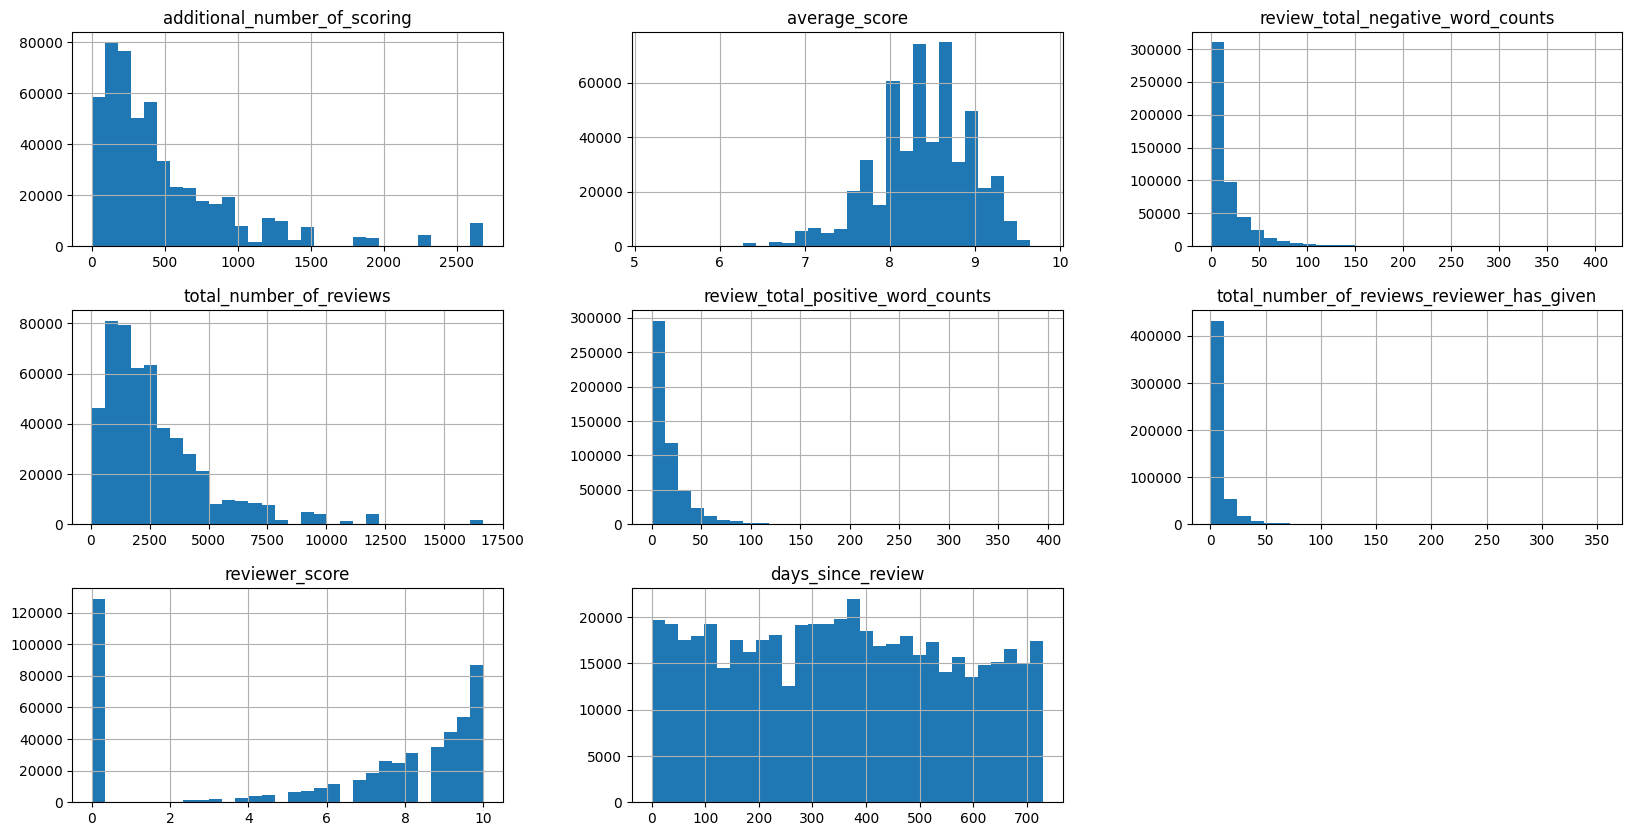

In [162]:
num_features.hist(
    bins=30,
    figsize=(20, 10)
)


*The 'days_since_review' doesnt provide us with much information. The 'reviewer_score' has a large frequency value at 0, because in our test data set we set values for 'reviewer_score' to 0 for a test data set.*

*Lets closely examine 'additional_number_of_scoring', 'average_score'*

#### additional_number_of_scoring

In [163]:
# select any single hotel to see how the values for 'additional_number_of_scoring' and 'average_score' distributed
num_features[(df['hotel_name']=='The May Fair Hotel')][['additional_number_of_scoring', 'average_score']].describe()

,additional_number_of_scoring,average_score
count,800.0,8.000000e+02
mean,581.0,8.400000e+00
std,0.0,1.777468e-15
min,581.0,8.400000e+00
25%,581.0,8.400000e+00
50%,581.0,8.400000e+00
75%,581.0,8.400000e+00
max,581.0,8.400000e+00


*From the table above, it's evident that the columns 'additional_number_of_scoring' and 'average_score' have uniform values for each hotel.*

*Lets see a boxplot for 'additional_number_of_scoring'*

Text(0, 0.5, 'Frequency')

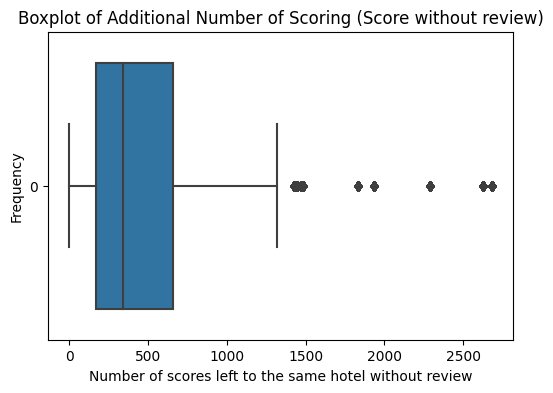

In [164]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.boxplot(
    data=num_features['additional_number_of_scoring'],
    orient='horiz',

)
ax.set_title('Boxplot of Additional Number of Scoring (Score without review)')
ax.set_xlabel('Number of scores left to the same hotel without review')
ax.set_ylabel('Frequency')


*Some hotels might have a significantly larger capacity compared to others, allowing them to accommodate more guests. This results in a higher number of additional reviews for these hotels. This skewed distribution of reviews could potentially affect the performance of our predictive model*

*The data is not normally distributed, so we will use IQR method to replace outliers in 'additional_number_of_scoring' with the lower_bound or upper_bound values respectively*

In [165]:
# Calculate the IQR
Q1 = num_features['additional_number_of_scoring'].quantile(0.25)
Q3 = num_features['additional_number_of_scoring'].quantile(0.75)
IQR = Q3 - Q1

# Identify Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace Outliers
num_features['additional_number_of_scoring'] = np.where(num_features['additional_number_of_scoring'] < lower_bound, lower_bound, num_features['additional_number_of_scoring'])
num_features['additional_number_of_scoring'] = np.where(num_features['additional_number_of_scoring'] > upper_bound, upper_bound, num_features['additional_number_of_scoring'])


#### review_total_negative_word_counts and review_total_positive_word_counts

*Let looks at the boxplot for review_total_negative_word_counts and review_total_positive_word_counts*

Text(0, 0.5, 'Frequency')

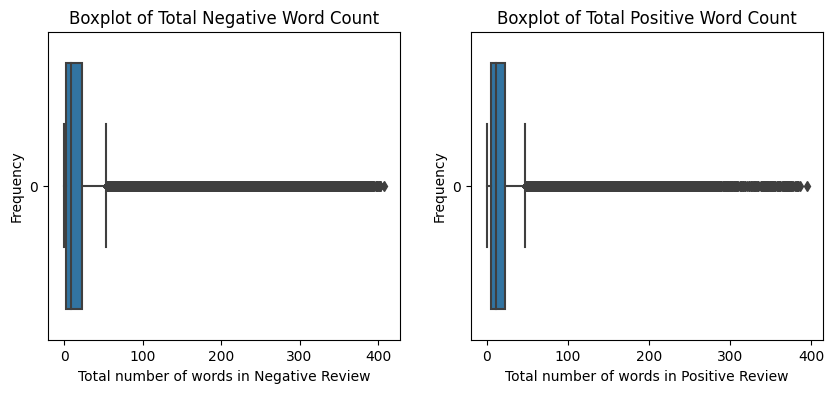

In [166]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.boxplot(
    data=num_features['review_total_negative_word_counts'],
    orient='horiz',
    ax=ax[0]

)
ax[0].set_title('Boxplot of Total Negative Word Count')
ax[0].set_xlabel('Total number of words in Negative Review')
ax[0].set_ylabel('Frequency')

sns.boxplot(
    data=num_features['review_total_positive_word_counts'],
    orient='horiz',
    ax=ax[1]

)
ax[1].set_title('Boxplot of Total Positive Word Count')
ax[1].set_xlabel('Total number of words in Positive Review')
ax[1].set_ylabel('Frequency')

*We can also observe outliers in the above boxplots. Some reviews might be much longer, then the median value and this distribution of word counts could potentially affect our model. We will use IQR method and fullfill outliers with a lower and upper bounds respectively.*

In [167]:
# Calculate the IQR for review negative word count
Q1 = num_features['review_total_negative_word_counts'].quantile(0.25)
Q3 = num_features['review_total_negative_word_counts'].quantile(0.75)
IQR = Q3 - Q1

# Identify Outlier Boundaries for review negative word counts
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace Outliers in review negative word counts
num_features['review_total_negative_word_counts'] = np.where(num_features['review_total_negative_word_counts'] < lower_bound, lower_bound, num_features['review_total_negative_word_counts'])
num_features['review_total_negative_word_counts'] = np.where(num_features['review_total_negative_word_counts'] > upper_bound, upper_bound, num_features['review_total_negative_word_counts'])


In [168]:
# Calculate the IQR for review positive word count
Q1 = num_features['review_total_positive_word_counts'].quantile(0.25)
Q3 = num_features['review_total_positive_word_counts'].quantile(0.75)
IQR = Q3 - Q1

# Identify Outlier Boundaries for review positive word counts
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace Outliers in review positive word counts
num_features['review_total_positive_word_counts'] = np.where(num_features['review_total_positive_word_counts'] < lower_bound, lower_bound, num_features['review_total_positive_word_counts'])
num_features['review_total_positive_word_counts'] = np.where(num_features['review_total_positive_word_counts'] > upper_bound, upper_bound, num_features['review_total_positive_word_counts'])


#### total_number_of_reviews_reviewer_has_given

*Let looks at the boxplot for a total number of reviews reviewer has given*

Text(0, 0.5, 'Frequency')

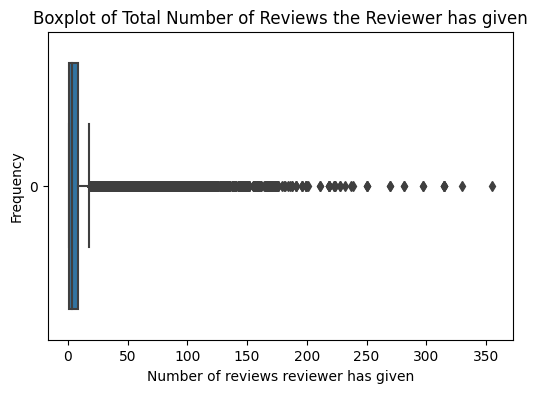

In [169]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.boxplot(
    data=num_features['total_number_of_reviews_reviewer_has_given'],
    orient='horiz',

)
ax.set_title('Boxplot of Total Number of Reviews the Reviewer has given')
ax.set_xlabel('Number of reviews reviewer has given')
ax.set_ylabel('Frequency')


*We can also observe outliers here, which can potentially affect our model. There are some people that travel much more then the average person, and hence hence the number of reviews left by this visitors will be dramatically larger compare to average traveler. We will use same IQR method approach to handle outliers*

In [170]:
# Calculate the IQR for total number of reviews left by reviewer
Q1 = num_features['total_number_of_reviews_reviewer_has_given'].quantile(0.25)
Q3 = num_features['total_number_of_reviews_reviewer_has_given'].quantile(0.75)
IQR = Q3 - Q1

# Identify Outlier Boundaries for total number of reviews left by reviewer
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace Outliers in total number of reviews left by reviewer
num_features['total_number_of_reviews_reviewer_has_given'] = np.where(num_features['total_number_of_reviews_reviewer_has_given'] < lower_bound, lower_bound, num_features['total_number_of_reviews_reviewer_has_given'])
num_features['total_number_of_reviews_reviewer_has_given'] = np.where(num_features['total_number_of_reviews_reviewer_has_given'] > upper_bound, upper_bound, num_features['total_number_of_reviews_reviewer_has_given'])


#### total_number_of_reviews

*Lets see a boxplot for 'total_number_of_reviews'. This column represents the total number of valid reviews the hotel has received. I think its very similiar to Additional number of scoring col that we reviews above, and as with a previous case, some hotels might have a significantly larger capacity compared to others, allowing them to accommodate more guests. This results in a higher number of total reviews.*

Text(0, 0.5, 'Frequency')

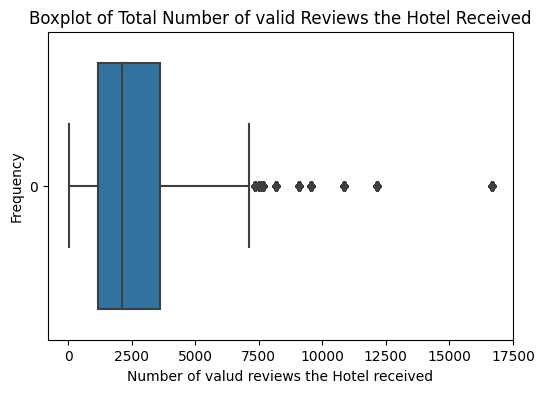

In [171]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.boxplot(
    data=num_features['total_number_of_reviews'],
    orient='horiz',

)
ax.set_title('Boxplot of Total Number of valid Reviews the Hotel Received')
ax.set_xlabel('Number of valud reviews the Hotel received')
ax.set_ylabel('Frequency')


*As with previous cases we can observe outliers. We will use the same IQR method to handle them*

In [172]:
# Calculate the IQR for total number of reviews 
Q1 = num_features['total_number_of_reviews'].quantile(0.25)
Q3 = num_features['total_number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1

# Identify Outlier Boundaries for total number of reviews 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace Outliers in total number of reviews 
num_features['total_number_of_reviews'] = np.where(num_features['total_number_of_reviews'] < lower_bound, lower_bound, num_features['total_number_of_reviews'])
num_features['total_number_of_reviews'] = np.where(num_features['total_number_of_reviews'] > upper_bound, upper_bound, num_features['total_number_of_reviews'])


#### *For the rest of the numerical features, we will leave them as it is. The 'average score' and the 'reviewer score' features, has values ranging from 0-10, so there no outliers, and the histograms for this features look normal. The feature 'days since review' has a shape of y=x, and it seems like doesnt have any significance by it own*

# Feature Engineering

### Categorical

#### hotel_address

In [173]:
# Check the address format
for i in range(0, 30, 2):
    display(cat_features['hotel_address'].iloc[i])

'Stratton Street Mayfair Westminster Borough London W1J 8LT United Kingdom'

'151 bis Rue de Rennes 6th arr 75006 Paris France'

'Molenwerf 1 1014 AG Amsterdam Netherlands'

'97 Cromwell Road Kensington and Chelsea London SW7 4DN United Kingdom'

'190 Queen s Gate Kensington and Chelsea London SW7 5EX United Kingdom'

'Molenwerf 1 1014 AG Amsterdam Netherlands'

'16 Sumner Place Kensington and Chelsea London SW7 3EG United Kingdom'

'Putget 68 Sarri St Gervasi 08023 Barcelona Spain'

'1 Kings Cross Road Islington London WC1X 9HX United Kingdom'

'59 Leinster Square Kensington and Chelsea London W2 4PS United Kingdom'

'20 Upper Ground Southwark London SE1 9PD United Kingdom'

'10a Chestnut Plaza Westfield Stratford City Olympic Park Newham London E20 1GL United Kingdom'

'8 rue Laferriere 9th arr 75009 Paris France'

'Balmes 117 Eixample 08008 Barcelona Spain'

'Apollolaan 138 Oud Zuid 1077 BG Amsterdam Netherlands'

Except United Kingdom all other countries follow the same format zipcode + city + country

We will create new features:
 - hotel_country - Can help identify if the review_rating based on the country of the hotel.
 
 - hotel_city - Can help identify if the review_rating based on the city of the hotel
 
 - hotel_zipcode - Can help identify if review_rating based on zipcode of the hotel. 

**Create new feature 'hotel_country'**

In [174]:
#create function that extracts hotel country from 'hotel_address' feature
def hotel_country(address):
    if address.split(' ')[-1] != 'Kingdom':
        return address.split(' ')[-1]
    else:
        return ' '.join(address.split(' ')[-2:])
    
cat_features['hotel_country'] = cat_features['hotel_address'].apply(hotel_country)

In [175]:
# unique countries
cat_features['hotel_country'].nunique()

6

We have only 6 unique values for hotel_country. I will use OneHot encoding

In [176]:
cat_features = pd.get_dummies(cat_features, columns=['hotel_country'], drop_first=True)

**Create new feature 'hotel_city'**

In [177]:
#function that extracts city from 'hotel_address'
def hotel_city(address):
    if address.split(' ')[-1] != 'Kingdom':
        return address.split(' ')[-2]
    else:
        return address.split(' ')[-5]

cat_features['hotel_city'] = cat_features['hotel_address'].apply(hotel_city)

In [178]:
# Number of unique cities
cat_features['hotel_city'].nunique()

6

We have only 6 unique values for hotel_city. I will use OneHot encoding to encode this feature

In [179]:
cat_features = pd.get_dummies(cat_features, columns=['hotel_city'], drop_first=True)

**Create new feature 'hotel_zipcode'**

In [180]:
def hotel_zipcode(address):
    if address.split(' ')[-1] != 'Kingdom' and address.split(' ')[-1] != 'Netherlands':
        return address.split(' ')[-3]
    else:
        return ' '.join(address.split(' ')[-4:-2])
    
cat_features['hotel_zipcode'] = cat_features['hotel_address'].apply(hotel_zipcode)

In [181]:
# Number of unique zip codes
cat_features['hotel_zipcode'].nunique()

601

We have 601 values, I will use Binary encoder for hotel_zipcode encoding

In [182]:
binary_encoder = ce.BinaryEncoder(cols=['hotel_zipcode'])
cat_features = binary_encoder.fit_transform(cat_features)

Drop the 'hotel_address' column, I dont see any other useful information I can extract from the string

In [183]:
cat_features.drop(columns=['hotel_address'], axis=1, inplace=True)

#### review_date

I will create new features:

- review_month - Can help identify if some countries are more popular during particular month, it might be due to climate, local events.

- review_year - Can help identify if the sentiment of the hotel visitors are changing over time.

- review_season - Can help identify if the sentiment of the visitors are related to the season of their visit

**Create new feature 'review_month'**

In [184]:
cat_features['review_month'] = cat_features['review_date'].dt.month

**Create new feature 'review_year'**

In [185]:
cat_features['review_year'] = cat_features['review_date'].dt.year

**Create new feature 'review_season'**

In [186]:
# Function that takes month number and returns season accordingly
def get_season(month):
    if month >= 3 and month <= 5:
        return 1
    elif month >= 6 and month <= 8:
        return 2
    elif month >= 9 and month <= 11:
        return 3
    else:
        return 4

# Apply function 
cat_features['review_season'] = cat_features['review_date'].dt.month.apply(get_season)

drop review_date column

In [187]:
cat_features.drop(['review_date'], axis=1, inplace=True)

**The new features we created from 'review_date' all of numeric type, and doesnt require further encoding**

#### hotel_name

Hotel name could usefull for brand identification

In [188]:
# Lets see how many unique hotel names we have
cat_features['hotel_name'].nunique()

1492

Lets see what percentage of the entire data set the most 100 frequent hotels has

In [189]:
cat_features['hotel_name'].value_counts(normalize=True)[0:100].sum()

0.30966705533815386

The 100 most frequent visited hotels in our data set take 30% of the data set

Lets create a list with a 100 most frequent hotels in our data set.

If the hotel name would be in the list, the hotel name stays as it is, otherwise we will mark it as 'other'

In [190]:
# create a list with top 100 frequent hotel names
top_hotel_names = cat_features['hotel_name'].value_counts(normalize=True)[0:100].index.tolist()

# apply function to 'hotel_name' column, if the name in the list, keep it as it is, otherwise change it to 'other'
cat_features['hotel_name'] = cat_features['hotel_name'].apply(lambda x: x if x in top_hotel_names else 'other')

Lets check now how many unique hotels we have

In [191]:
# Lets see how many unique hotel names we have
cat_features['hotel_name'].nunique()

101

I will use BinaryEncoding to encode hotel_name feature

In [192]:
binary_encoder = ce.BinaryEncoder(cols=['hotel_name'])

cat_features = binary_encoder.fit_transform(cat_features)

#### reviewer_nationality

Cultural differences of the hotel visitors could impact the rating of the hotel. The visitor that visits hotel could come from overseas and have totally opposite culture to the country it visits, and his hotel feedback might reflect the score.

In [193]:
# number of unique nationalities
cat_features['reviewer_nationality'].nunique()

227

We have a total of 227 unique nationalities. Lets look at percentage level how much each nationality allocates

In [194]:
cat_features['reviewer_nationality'].value_counts(normalize=True)

reviewer_nationality
 United Kingdom               0.475650
 United States of America     0.068661
 Australia                    0.042029
 Ireland                      0.028753
 United Arab Emirates         0.019847
                                ...   
 Guinea                       0.000002
 Tuvalu                       0.000002
 Comoros                      0.000002
 Anguilla                     0.000002
 Cape Verde                   0.000002
Name: proportion, Length: 227, dtype: float64

Lets check how many percent allocated by top 5 nationalities

In [195]:
cat_features['reviewer_nationality'].value_counts(normalize=True)[0:5].sum()

0.6349404672982416

We have top five nationalities that left review to hotel allocate 63.49%. 

It would make sense for us to keep top five nationalities and the rest mark as 'other'

In [196]:
# create array with top five nationalities
top_five_nationalities = cat_features['reviewer_nationality'].value_counts()[0:5].index.tolist()

cat_features['reviewer_nationality'] = cat_features['reviewer_nationality'].apply(lambda x: x if x in top_five_nationalities else 'other')

Now we have six unique nationalities. We will use OneHotEncoding to encode them

In [197]:
cat_features = pd.get_dummies(cat_features, columns=['reviewer_nationality'], drop_first=True)

#### negative_review 

Lets explore some negative reviews

In [198]:
for i in range(0, 20, 2):
    display(cat_features['negative_review'].iloc[i])

' Leaving '

' No kettle in room '

' Torn sheets '

' Nothing it was lovely '

' undergoing refurbishment no tea coffer in room room very small no ramp at entrance for wheeled suitcases no coffee available in lounge next morning early checkout at 11 00am'

' They have lost their license and cannot sell alcohol or change your currency '

'No Negative'

'No Negative'

' Nothing hotel refurb great'

' I got a room in Basment 1 room 09 in same time next room 10 has some mantance work which made a noise early morning also it is not fair the check out at 10 30 am where there some hotel next to them has normal check out at 12'

In negative review column we have some entries 'No Negative'. 

We can also see that some entries in 'negative_review' has leading and trailing spaces, let fix it.

Also we removed some outliers prior in our data set for num_features, specifically for 'review_total_negative_word_counts', and replaced them with upper and lower boundaries of IQR

We will use same approach here and shorten the long reviews to the maximum number of words of the upper bound of 'review_total_negative_word_counts'.

In [199]:
#lets create a function that will shorten the long review to upper boundary of the 'review_total_negative_word_counts', 
# otherwise it could be acted as outliers
max_negative_word_count = int(num_features['review_total_negative_word_counts'].describe().loc['max'])

# function that takes a sentence and check if its word count longer then upper boundary of 'review_total_negative_word_counts'
# if split sentence length > upper boundary then strips sentence 
def review_normalizer(review):
    word_count = len(review.strip().split(" "))
    
    if word_count > max_negative_word_count:
        review = " ".join(review.strip().split(" ")[0:max_negative_word_count])
        return review
    return " ".join(review.strip().split(" "))

# applying function
cat_features['negative_review'] = cat_features['negative_review'].apply(review_normalizer)


Lets examine this entries more closely to see what it could mean

In [200]:
# lets create a mask that will show a reviewer_score only for 'No Negative' entries 
# we will create data set with the  columns 'reviewer_score', 'negative_review' and 'sample' 

# creating new data 
negative_review_df = df[['reviewer_score', 'sample']].copy()
negative_review_df['negative_review'] = cat_features['negative_review'].copy()
                        

# creating mask, we will also filter by 'sample' to get rid of default values that we filled in test data set for 'reviewer_score'
mask = (negative_review_df['negative_review']=='No Negative') & (negative_review_df['sample'] == 1)

negative_review_df[mask]['reviewer_score'].describe()

count    95833.000000
mean         9.338900
std          0.924458
min          2.500000
25%          9.200000
50%          9.600000
75%         10.000000
max         10.000000
Name: reviewer_score, dtype: float64

In [201]:
negative_review_df[mask]['reviewer_score'].value_counts(normalize=True).head(5)

reviewer_score
10.0    0.430144
9.6     0.198418
9.2     0.127430
8.8     0.080599
8.3     0.058059
Name: proportion, dtype: float64

We can see that when reviewer leaves review 'No Negative', it means that a visitor satisfied  with his stay at the hotel

Text(0.5, 1.0, 'Boxplot of "No Negative" reviews')

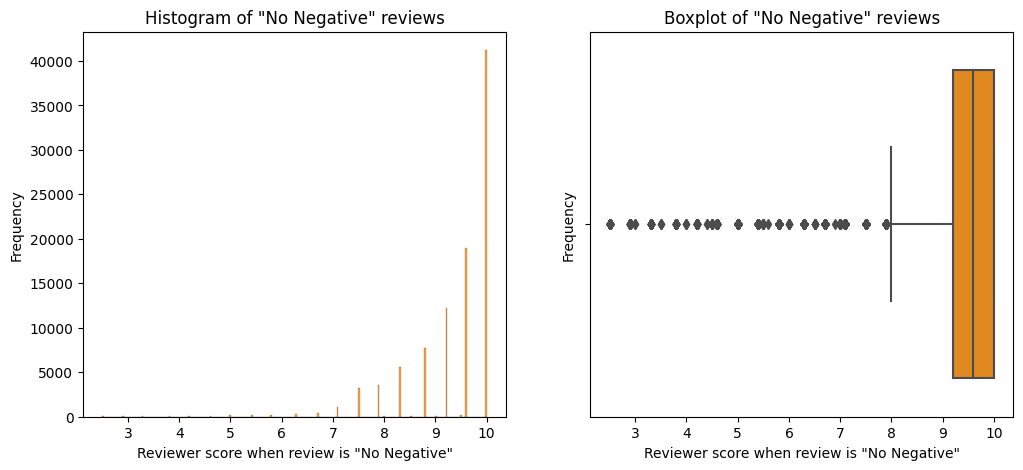

In [202]:
#lets visualize it
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(
    x=negative_review_df[mask]['reviewer_score'],
    ax=ax[0],
    color='darkorange'
)

sns.boxplot(
    x=negative_review_df[mask]['reviewer_score'],
    ax=ax[1],
    color='darkorange'
)

ax[0].set_xlabel('Reviewer score when review is "No Negative"')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of "No Negative" reviews')

ax[1].set_xlabel('Reviewer score when review is "No Negative"')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Boxplot of "No Negative" reviews')

From the above boxplot we see that IQR is between review score 9 and 10. The histogram has an exponential shape.

Lets see what a compound score nltk language sentiment analyzer will give us for the "No Negative" reviews.

The compound score in the Natural Language Toolkit (NLTK)'s sentiment analysis, specifically using the VADER (Valence Aware Dictionary and sEntiment Reasoner) method, ranges from -1 to 1.

    A score of -1 represents extremely negative sentiment.
    A score of 0 represents a neutral sentiment.
    A score of 1 represents extremely positive sentiment.

In [203]:
sent_analyzer = SentimentIntensityAnalyzer()
print(sent_analyzer.polarity_scores('No Negative'))

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.7096}


We can see that compound score we received is totally opposite of the actual review score the reviewer left to the hotel.

When we will use the NLTK for a new feature, we should manually fill compound score of 'No Negative' with the mode value of 0.96 (9.6)

Lets now apply NLTK sentiment analyzer and create new feature negative_sentiment_compound.

In [204]:
# Lets first check how NLTK handles the default feedback such as 'No Negative' and 'N A'
sent_analyzer = SentimentIntensityAnalyzer()

rev1 = "No Negative"
rev2 = "N A"

print(f"review 1:\n{rev1}\nScore: {sent_analyzer.polarity_scores(rev1)}")

print(f"\nreview 2:\n{rev2}\nScore: {sent_analyzer.polarity_scores(rev2)}")

review 1:
No Negative
Score: {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.7096}

review 2:
N A
Score: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}


Lets check how this compound scores from analyzer compared to mode of this values

In [205]:
# Lets get mode value for 'N A' feedback
negative_review_df[(negative_review_df['negative_review'] == 'N A') & (negative_review_df['sample'] == 1)].describe()

,reviewer_score,sample
count,818.000000,818.0
mean,9.591320,1.0
std,0.693852,0.0
min,2.500000,1.0
25%,9.600000,1.0
50%,10.000000,1.0
75%,10.000000,1.0
max,10.000000,1.0


In [206]:
# Lets get mode value for 'No Negative' feedback
negative_review_df[(negative_review_df['negative_review'] == 'No Negative') & (negative_review_df['sample'] == 1)]['reviewer_score'].describe()

count    95833.000000
mean         9.338900
std          0.924458
min          2.500000
25%          9.200000
50%          9.600000
75%         10.000000
max         10.000000
Name: reviewer_score, dtype: float64

So the mode values:

'N A': 10

'No Negative': 9.6

This values are very different from what we getting from NLTK analyzer.

For the 'N A' and 'No Negative' we will fill values manually.

Compound Score equivalent representation:

'N A': 10 -> (1.0 × 2) − 1 = **1.0**

'No Negative': 9.6 -> (0.96 × 2) − 1 = **0.92**

In [207]:
# lets create a function that takes a sentence and returns its NLTK compound value
# for the 'N A' and 'No Negative' it will return the mode values
sent_analyzer = SentimentIntensityAnalyzer()

def nltk_sentiment_analyzer(review):
    if review == 'No Negative':
        return 0.92
    elif review == 'N A':
        return 1.0
    else:
        return sent_analyzer.polarity_scores(review)['compound']
    
negative_review_df['negative_sentiment_comp'] = negative_review_df['negative_review'].apply(nltk_sentiment_analyzer)

Add the 'negative_sentiment_comp' to *cat_features* and drop the 'negative_review' column

In [208]:
cat_features['negative_sentiment_comp'] = negative_review_df['negative_sentiment_comp']
cat_features.drop(columns=['negative_review'], axis=1, inplace=True)

#### positive_review

Lets do the same for positive_review

In [209]:
for i in range(0, 20, 2):
    display(cat_features['positive_review'].iloc[i])

' Staff were amazing'

'No Positive'

' The staff was very friendly and helpful Breakfasts were just extraordinary Room was clean quiet and very spacious '

' Very central location 2 minutes walk from Gloucester Rd tube station and 10 15 minutes walk from the museums Lots of restaurants and bars on the doorstep '

' staff very good location wonderful '

' Rooms were really nice With great bathroom shower room'

' Great location beautiful design very friendly and kind reception brilliant service super breakfast'

' Nice hotel very good location'

' Room very good'

' it was good location but not close to main street or metro station Also the reception staff keep Changing and not look so professional in deal with guest cleaning is ok and the Breakfast is good '

In negative review column we have some entries 'No Negative' and in positive reviews we have 'No Positive'. 

We can also see that some entries in 'positive_review' has leading and trailing spaces, let fix it.

Also we removed some outliers prior in our data set for num_features, specifically for 'review_total_positive_word_counts', and replaced them with upper and lower boundaries of IQR

We will use same approach here and shorten the long reviews to the maximum number of words of the upper bound of 'review_total_positive_word_counts'.

In [210]:
#lets create a function that will shorten the long review to upper boundary of the 'review_total_positivepositive_word_counts', 
# otherwise it could be acted as outliers
max_positive_word_count = int(num_features['review_total_positive_word_counts'].describe().loc['max'])

# function that takes a sentence and check if its word count longer then upper boundary of 'review_total_positive_word_counts'
# if split sentence length > upper boundary then strips sentence 
def review_normalizer(review):
    word_count = len(review.strip().split(" "))
    
    if word_count > max_positive_word_count:
        review = " ".join(review.strip().split(" ")[0:max_positive_word_count])
        return review
    return " ".join(review.strip().split(" "))

# applying function
cat_features['positive_review'] = cat_features['positive_review'].apply(review_normalizer)


Lets examine this entries more closely to see what it could mean

In [211]:
# lets create a mask that will show a reviewer_score only for 'No Positive' entries 
# we will create data set with the  columns 'reviewer_score', 'positive_review' and 'sample' 

# creating new data 
positive_review_df = df[['reviewer_score', 'sample']].copy()
positive_review_df['positive_review'] = cat_features['positive_review'].copy()
                        

# creating mask, we will also filter by 'sample' to get rid of default values that we filled in test data set for 'reviewer_score'
mask = (positive_review_df['positive_review']=='No Positive') & (positive_review_df['sample'] == 1)

positive_review_df[mask]['reviewer_score'].describe()

count    26863.000000
mean         6.889063
std          1.945172
min          2.500000
25%          5.400000
50%          7.100000
75%          8.300000
max         10.000000
Name: reviewer_score, dtype: float64

In [212]:
positive_review_df[mask]['reviewer_score'].value_counts(normalize=True).head(5)

reviewer_score
7.5    0.090831
7.1    0.080743
6.7    0.069799
7.9    0.065518
9.2    0.062726
Name: proportion, dtype: float64

We can see that when reviewer leaves review 'No Positive', it means that a visitor was not completely satisfied with his stay at the hotel

Text(0.5, 1.0, 'Boxplot of "No Positive" reviews')

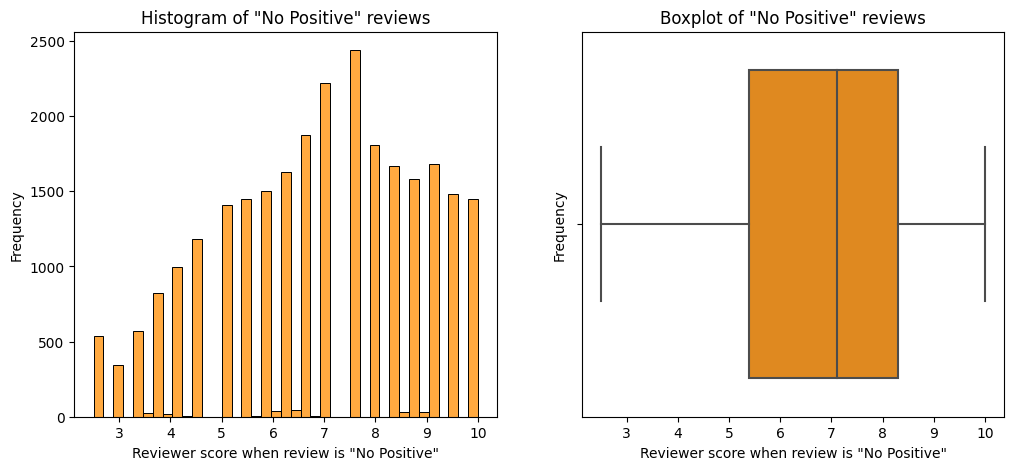

In [213]:
#lets visualize it
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(
    x=positive_review_df[mask]['reviewer_score'],
    ax=ax[0],
    color='darkorange'
)

sns.boxplot(
    x=positive_review_df[mask]['reviewer_score'],
    ax=ax[1],
    color='darkorange'
)

ax[0].set_xlabel('Reviewer score when review is "No Positive"')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of "No Positive" reviews')

ax[1].set_xlabel('Reviewer score when review is "No Positive"')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Boxplot of "No Positive" reviews')

From the above boxplot we see that IQR is between review score 5.4 and 8.3. 

Lets see what a compound score nltk language sentiment analyzer will give us for the "No Positive" reviews.

The compound score in the Natural Language Toolkit (NLTK)'s sentiment analysis, specifically using the VADER (Valence Aware Dictionary and sEntiment Reasoner) method, ranges from -1 to 1.

    A score of -1 represents extremely negative sentiment.
    A score of 0 represents a neutral sentiment.
    A score of 1 represents extremely positive sentiment.

In [214]:
sent_analyzer = SentimentIntensityAnalyzer()
print(sent_analyzer.polarity_scores('No Positive'))

{'neg': 0.379, 'neu': 0.0, 'pos': 0.621, 'compound': 0.34}


We can see that compound score we received for 'No Positive' review is very similiar to compound equivalent of the mode value 7.1 ( (0.71 x 2) - 1 = 0.42 )

Lets now apply NLTK sentiment analyzer and create new feature positive_sentiment_compound.

In [215]:
# Lets first check how NLTK handles the default feedback such as 'No Negative' and 'N A'
sent_analyzer = SentimentIntensityAnalyzer()

rev1 = "No Positive"
rev2 = "N A"

print(f"review 1:\n{rev1}\nScore: {sent_analyzer.polarity_scores(rev1)}")

print(f"\nreview 2:\n{rev2}\nScore: {sent_analyzer.polarity_scores(rev2)}")

review 1:
No Positive
Score: {'neg': 0.379, 'neu': 0.0, 'pos': 0.621, 'compound': 0.34}

review 2:
N A
Score: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}


Lets check how this compound scores from analyzer compared to mode of this values

In [216]:
# Lets get mode value for 'N A' feedback
positive_review_df[(positive_review_df['positive_review'] == 'N A') & (positive_review_df['sample'] == 1)].describe()

,reviewer_score,sample
count,26.000000,26.0
mean,7.492308,1.0
std,1.896718,0.0
min,3.300000,1.0
25%,6.400000,1.0
50%,7.500000,1.0
75%,9.100000,1.0
max,10.000000,1.0


In [217]:
# Lets get mode value for 'No Positive' feedback
positive_review_df[(positive_review_df['positive_review'] == 'No Positive') & (positive_review_df['sample'] == 1)]['reviewer_score'].describe()

count    26863.000000
mean         6.889063
std          1.945172
min          2.500000
25%          5.400000
50%          7.100000
75%          8.300000
max         10.000000
Name: reviewer_score, dtype: float64

So the mode values:

'N A': 7.5

'No Positive': 7.1

This values are very different from what we getting from NLTK analyzer.

For the 'N A' and 'No Positive' we will fill values manually.

Compound Score equivalent representation:

'N A': 7.5 -> (0.75 × 2) − 1 = **0.5**

'No Positive': 7.1 -> (0.71 × 2) − 1 = **0.42**

In [218]:
# lets create a function that takes a sentence and returns its NLTK compound value
# for the 'N A' and 'No Positive' it will return the mode values
sent_analyzer = SentimentIntensityAnalyzer()

def nltk_sentiment_analyzer(review):
    if review == 'No Positive':
        return 0.42
    elif review == 'N A':
        return 0.5
    else:
        return sent_analyzer.polarity_scores(review)['compound']
    
positive_review_df['positive_sentiment_comp'] = positive_review_df['positive_review'].apply(nltk_sentiment_analyzer)

Add the 'positive_sentiment_comp' to *cat_features* and drop the 'positive_review' column

In [219]:
cat_features['positive_sentiment_comp'] = positive_review_df['positive_sentiment_comp']
cat_features.drop(columns=['positive_review'], axis=1, inplace=True)

#### 'tags'

In [220]:
# lets look how the data looks in tags column
for i in range(0, 20, 4):
    print(cat_features['tags'].iloc[i])

[' Leisure trip ', ' Couple ', ' Studio Suite ', ' Stayed 2 nights ', ' Submitted from a mobile device ']
[' Business trip ', ' Couple ', ' Standard Double or Twin Room ', ' Stayed 6 nights ']
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ']
[' Business trip ', ' Family with young children ', ' Luxury Room ', ' Stayed 1 night ']
[' Business trip ', ' Solo traveler ', ' Standard Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']


We have an array structure inside the string, also elements of the array has leading and trailing spaces.

In [221]:
# lets create a copy of df and convert 'tags' to array structure in a new df

#creating a copy of df
tags_df = df[['reviewer_score', 'tags']].copy()

tags_df.head(3)

,reviewer_score,tags
0,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ..."
1,6.3,"[' Business trip ', ' Couple ', ' Standard Dou..."
2,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern..."


In [222]:
# creating the function that takes a string, splits it into elements and removes leading and trailing spaces

def tags_to_arr(string):
    string = string[2:-2]
    tags = string.split(" ', '")
    tags = [tag.strip() for tag in tags]
    return tags

# applying function
tags_df['tags'] = tags_df['tags'].apply(tags_to_arr)

In [223]:
# lets see how many uniqued tags we have
unique_tags = tags_df['tags'].explode()
unique_tags.describe()

count          2355206
unique            2428
top       Leisure trip
freq            417538
Name: tags, dtype: object

In [224]:
# let see the most twenty common tags
unique_tags.value_counts()[0:20]

tags
Leisure trip                      417538
Submitted from a mobile device    307470
Couple                            252128
Stayed 1 night                    193568
Stayed 2 nights                   133850
Solo traveler                     108476
Stayed 3 nights                    95761
Business trip                      82884
Group                              65361
Family with young children         60989
Stayed 4 nights                    47777
Double Room                        35207
Standard Double Room               32247
Superior Double Room               31361
Family with older children         26334
Deluxe Double Room                 24812
Double or Twin Room                22393
Stayed 5 nights                    20826
Standard Double or Twin Room       17479
Classic Double Room                16877
Name: count, dtype: int64

In [225]:
# let see how how much top twenty tags occupy percentage of the entire set
unique_tags.value_counts(normalize=True)[0:20].sum()

0.8463539919650341

In [226]:
# lets try to group some tags in the dictionary and create new feature for them
tags_dict = {
    'trip_type': {'Leisure trip': 1, 'Business trip': 0},
    'trip_duration': {'Stayed 1 night': 1, 'Stayed 2 nights': 2, 'Stayed 3 nights': 3, 'Stayed 4 nights': 4, 'Stayed 5 nights': 5},
    'trip_review_device': {'Submitted from a mobile device': 1}, #other devices will be 0
    'trip_people_qty': {'Solo traveler': 1, 'Couple': 2, 'Group': 3, 'Family with young children': 4, 'Family with older children': 5},
    'trip_room_type' : {'Double Room': 1, 'Standard Double Room': 2, 'Superior Double Room': 3, 'Deluxe Double Room': 4, 'Double or Twin Room': 5, 'Standard Double or Twin Room': 6, 'Classic Double Room': 7}              
}

In [227]:
# Function to map tags
def map_tags(row, mapping):
    for tag in row:
        if tag in mapping:
            return mapping[tag]
    return 0  # default case if no tag is found

# Apply dictionary to create new features
for group, tag_mapping in tags_dict.items():
    tags_df[group] = tags_df['tags'].apply(lambda row: map_tags(row, tag_mapping))

In [228]:
# drop columns 'reviewer_score' and 'tags'
tags_df.drop(columns=['reviewer_score', 'tags'], axis=1, inplace=True)

In [229]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   trip_type           515431 non-null  int64
 1   trip_duration       515431 non-null  int64
 2   trip_review_device  515431 non-null  int64
 3   trip_people_qty     515431 non-null  int64
 4   trip_room_type      515431 non-null  int64
dtypes: int64(5)
memory usage: 19.7 MB


In [230]:
# add new features from tags_df data frame into cat_features
cat_features = pd.concat([cat_features, tags_df], axis=1)

In [231]:
# drop the 'tags' column from cat_features
cat_features.drop(columns=['tags'], axis=1, inplace=True)

### Numerical

#### ratio_negative_to_positive_word_count

Lets create a new feature which will be the ratio of negative word counts to positive word counts. In my opinion people tend to leave the longer comments towards the expririence they had during the stay

In [232]:
num_features['ratio_negative_to_positive_word_count'] = (num_features['review_total_negative_word_counts'] + 1) / (num_features['review_total_positive_word_counts'] + 1)

#### reviewer_credibility

Lets create new feature reviewer credibility, people that leave reviews on the regulars basis could be considered more trusted. 

We will look at the distribution of the total numbers of the review the reviewer has given, and create three categories:

    - Not credible (1)
    
    - Credible (2)
    
    - Very credible (3)

For the *Not credible* the values will be choose everything below the mode value. For the *Credible* we will choose range from Q2-Q3. And the *Very credible* we choose everything above Q3.

In [233]:
num_features['total_number_of_reviews_reviewer_has_given'].describe()

count    515431.000000
mean          5.770442
std           5.738871
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max          18.500000
Name: total_number_of_reviews_reviewer_has_given, dtype: float64

In [234]:
def credibility(number_of_reviews):
    if 1 < number_of_reviews < 3:
        return 1 #not credible
    elif 3 < number_of_reviews < 8:
        return 2 # credible
    else:
        return 3 # very credible

num_features['reviewer_credibility'] = num_features['total_number_of_reviews_reviewer_has_given'].apply(credibility)

### Check for multicollinearity

#### Categorical features

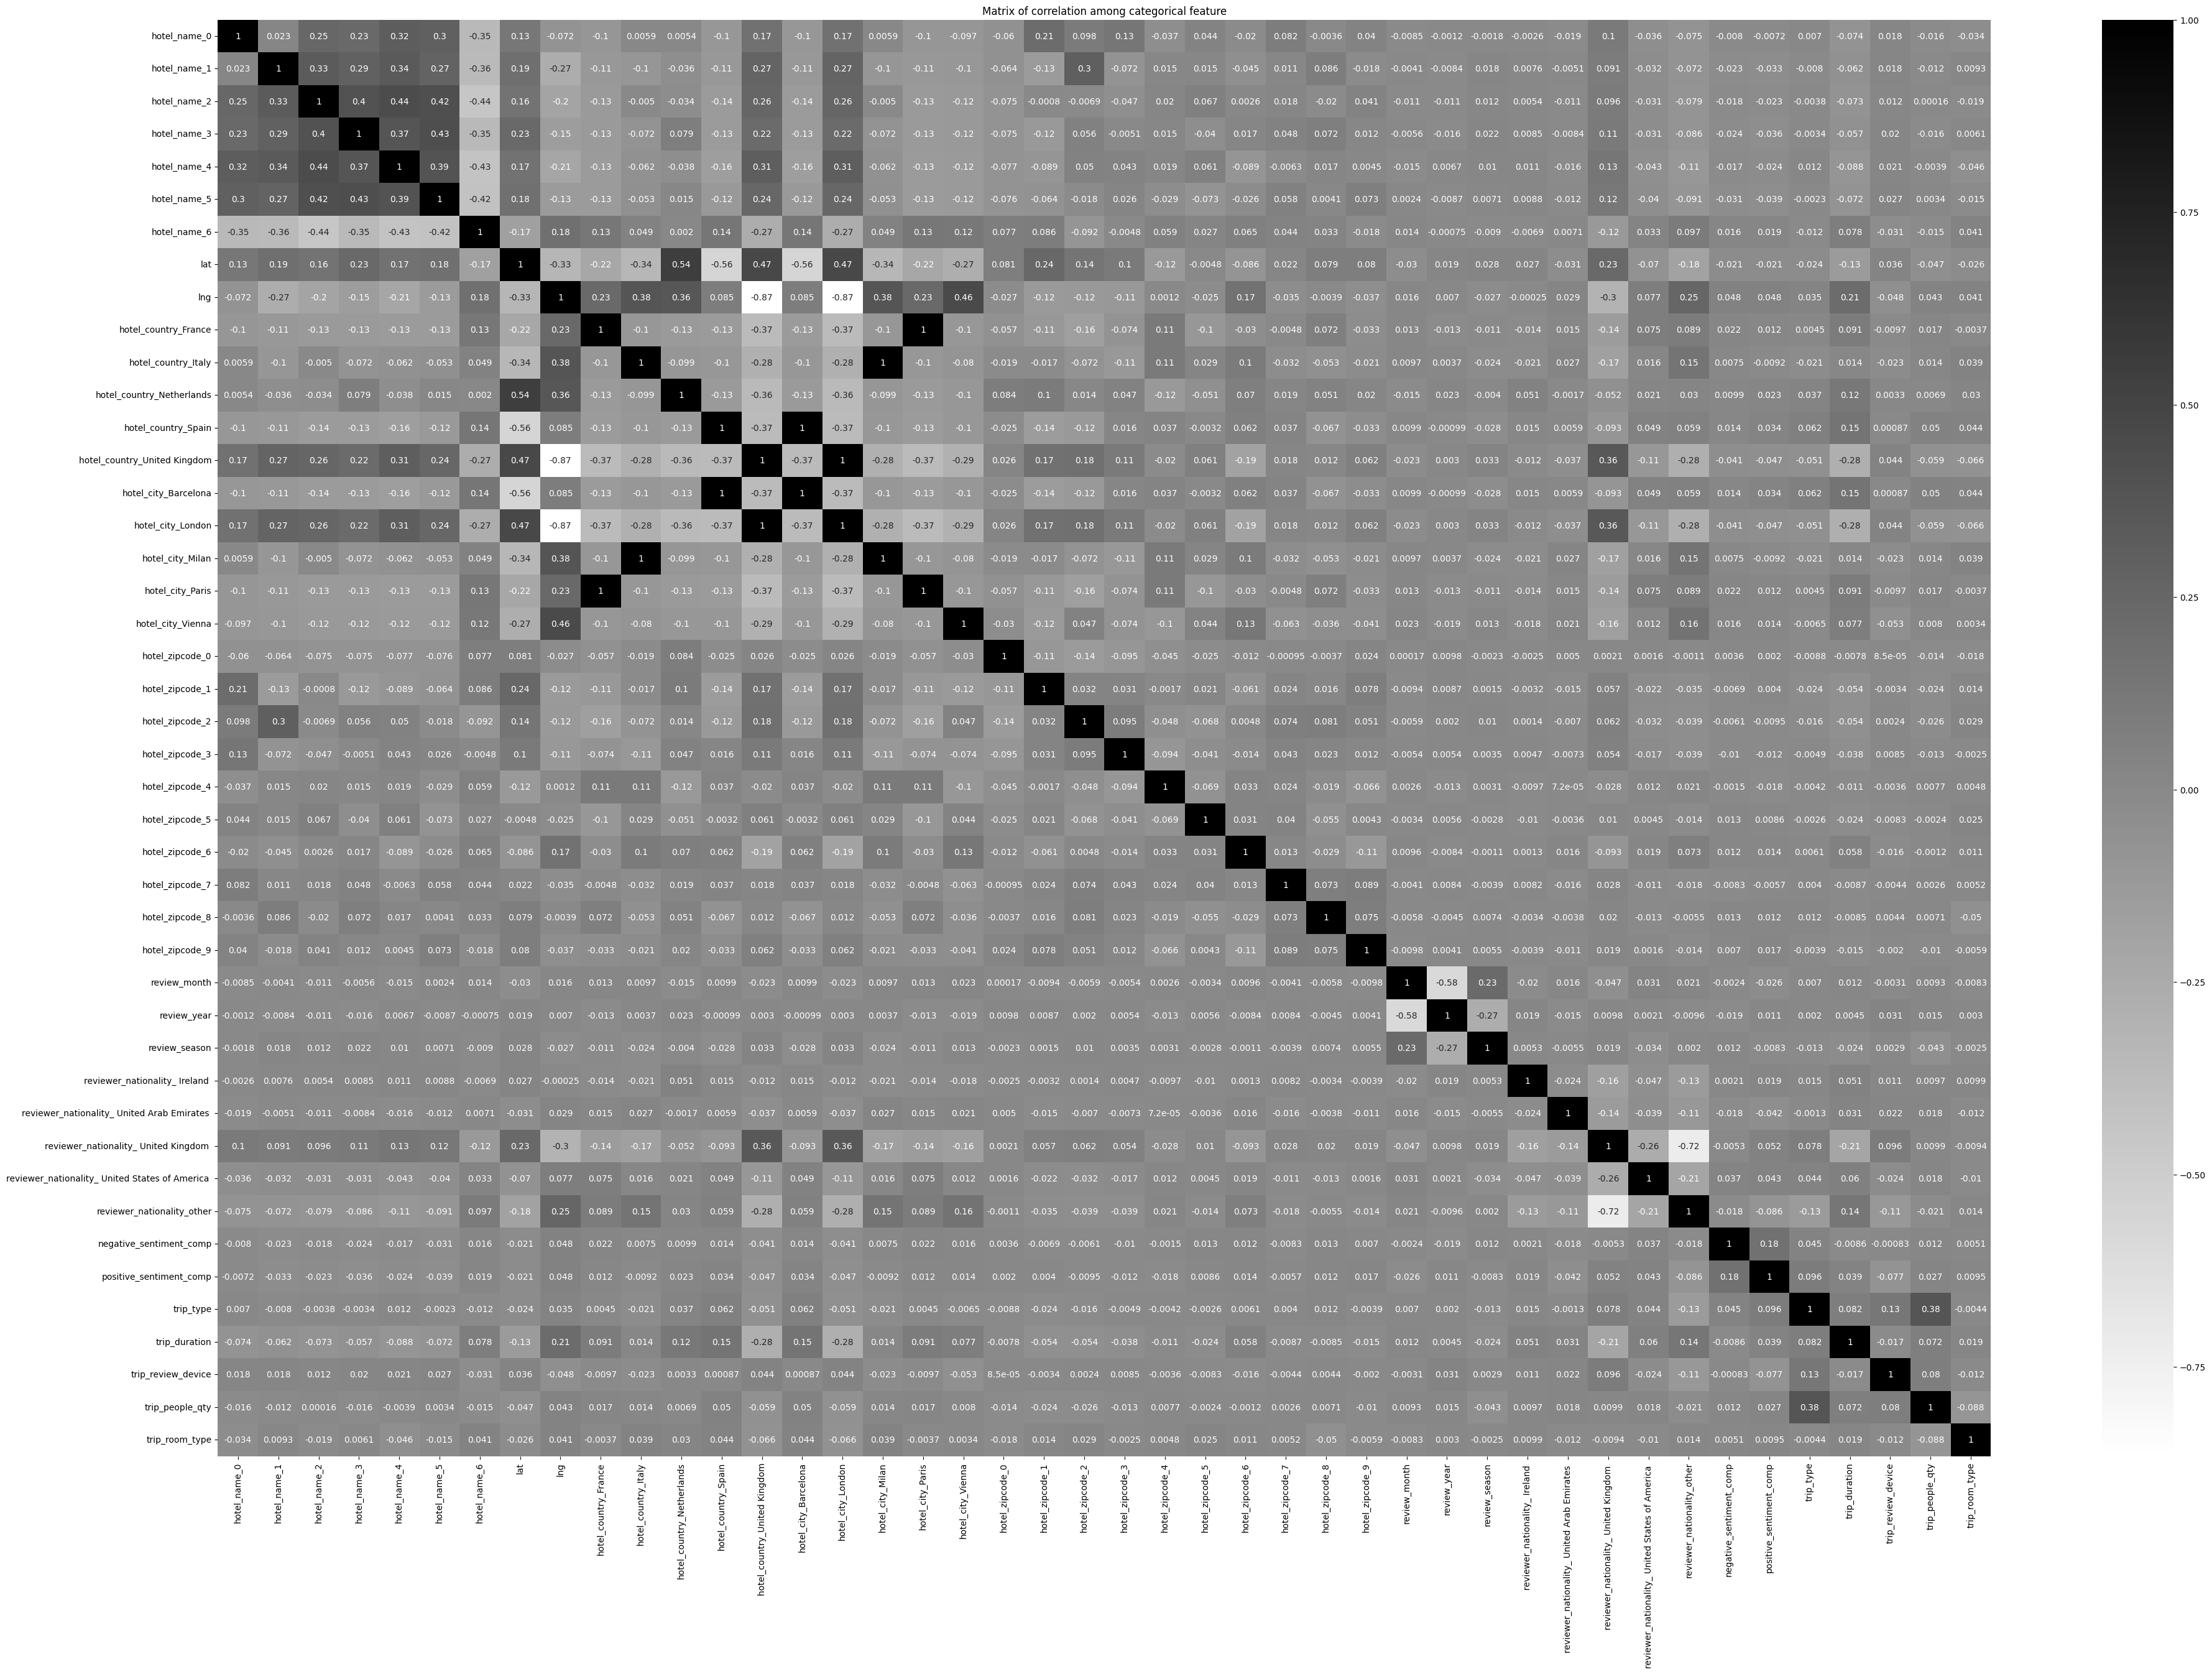

In [235]:
plt.figure(figsize=(46, 30))
corr_heatmap = sns.heatmap(cat_features.corr(method='spearman'), annot=True, cmap='binary')
corr_heatmap.set_title('Matrix of correlation among categorical feature');

We can see a high correlation among this categorical features:

'hotel_country_France', 'hotel_country_Italy', 'hotel_country_Spain', 'hotel_country_United Kingdom', 'hotel_city_London', 'reviewer_nationality_ United Kingdom.

We will drop this features from our categorical features

In [236]:
cat_features.drop(columns=['hotel_country_France', 'hotel_country_Italy', 'hotel_country_Spain', 'hotel_country_United Kingdom', 'hotel_city_London', 'reviewer_nationality_ United Kingdom '], axis=1, inplace=True)

#### Numerical features

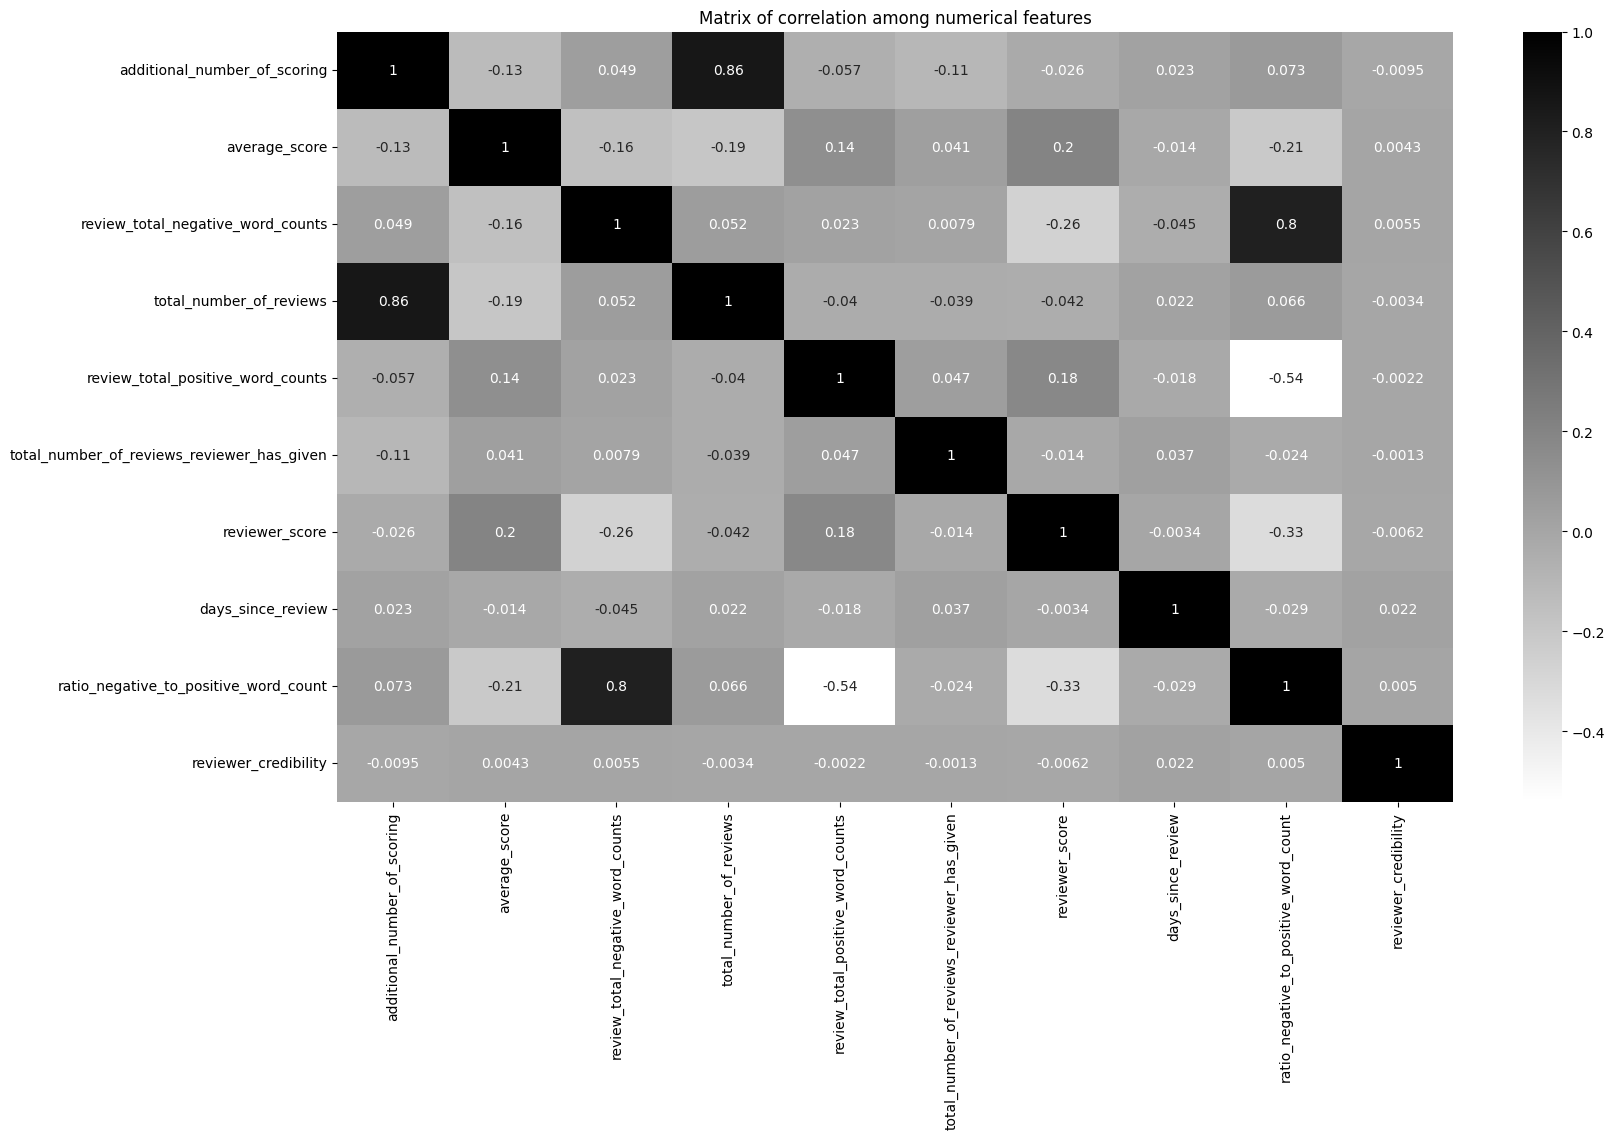

In [237]:
plt.figure(figsize=(18, 10))
corr_heatmap = sns.heatmap(num_features.corr(method='spearman'), annot=True, cmap='binary')
corr_heatmap.set_title('Matrix of correlation among numerical features');

We can see a high correlation among 'total_number_of_reviews', 'ratio_of_negative_to_positive_word_count'. We will drop this numerical features.

In [238]:
num_features.drop(columns=['total_number_of_reviews', 'ratio_negative_to_positive_word_count'], axis=1, inplace=True)

# Feature selection for Model

In this section we will perform Chi2 test to test relationship between categorical variables and the target values. For the continious numerical features we will perform Anova test to test relationship between numerical features and target values.

Lets combine numerical features and categorical features into one data set

In [239]:
encoded = pd.concat([num_features, cat_features], axis=1)

Adding 'sample' column to our encoded data set with the features for futures seperation of data into test and train

In [240]:
encoded['sample'] = df['sample']

Lets look at our encoded data set

In [241]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 47 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   additional_number_of_scoring                     515431 non-null  float64
 1   average_score                                    515431 non-null  float64
 2   review_total_negative_word_counts                515431 non-null  float64
 3   review_total_positive_word_counts                515431 non-null  float64
 4   total_number_of_reviews_reviewer_has_given       515431 non-null  float64
 5   reviewer_score                                   515431 non-null  float64
 6   days_since_review                                515431 non-null  int64  
 7   reviewer_credibility                             515431 non-null  int64  
 8   hotel_name_0                                     515431 non-null  int64  
 9   hotel_name_1   

Creating the list for numerical and categorical features names

In [242]:
cat_cols = [
    'additional_number_of_scoring',
    'average_score',
    'reviewer_credibility',
    'hotel_name_0',
    'hotel_name_1',
    'hotel_name_2',
    'hotel_name_3',
    'hotel_name_4',
    'hotel_name_5',
    'hotel_name_6',
    'hotel_country_Netherlands',
    'hotel_city_Barcelona',
    'hotel_city_Milan',
    'hotel_city_Paris',
    'hotel_city_Vienna',
    'hotel_zipcode_0',
    'hotel_zipcode_1',
    'hotel_zipcode_2',
    'hotel_zipcode_3',
    'hotel_zipcode_4',
    'hotel_zipcode_5',
    'hotel_zipcode_6',
    'hotel_zipcode_7',
    'hotel_zipcode_8',
    'hotel_zipcode_9',
    'reviewer_nationality_ Ireland ',
    'reviewer_nationality_ United Arab Emirates ',
    'reviewer_nationality_ United States of America ',
    'reviewer_nationality_other',
    'trip_type',
    'trip_review_device',
    'trip_people_qty',
    'trip_room_type'
]


In [243]:
num_cols = [
    'review_total_negative_word_counts',
    'review_total_positive_word_counts',
    'total_number_of_reviews_reviewer_has_given',
    'days_since_review',
    'review_month',
    'review_year',
    'review_season',
    'negative_sentiment_comp',
    'positive_sentiment_comp',
    'trip_duration',
    'lat',
    'lng',
]

Split the encoded data set into train and test part

In [244]:
#select test part
train_data = encoded.query('sample == 1').drop(['sample'], axis=1)
test_data = encoded.query('sample == 0').drop(['sample'], axis=1)

#create an array with values only from the col 'reviewer_score' from train data set
y = train_data['reviewer_score'].values

#drop the 'reviewer_score' column from the train data set
X = train_data.drop(['reviewer_score'], axis=1)

Lets perform Chi2 test for categorical features

<Axes: >

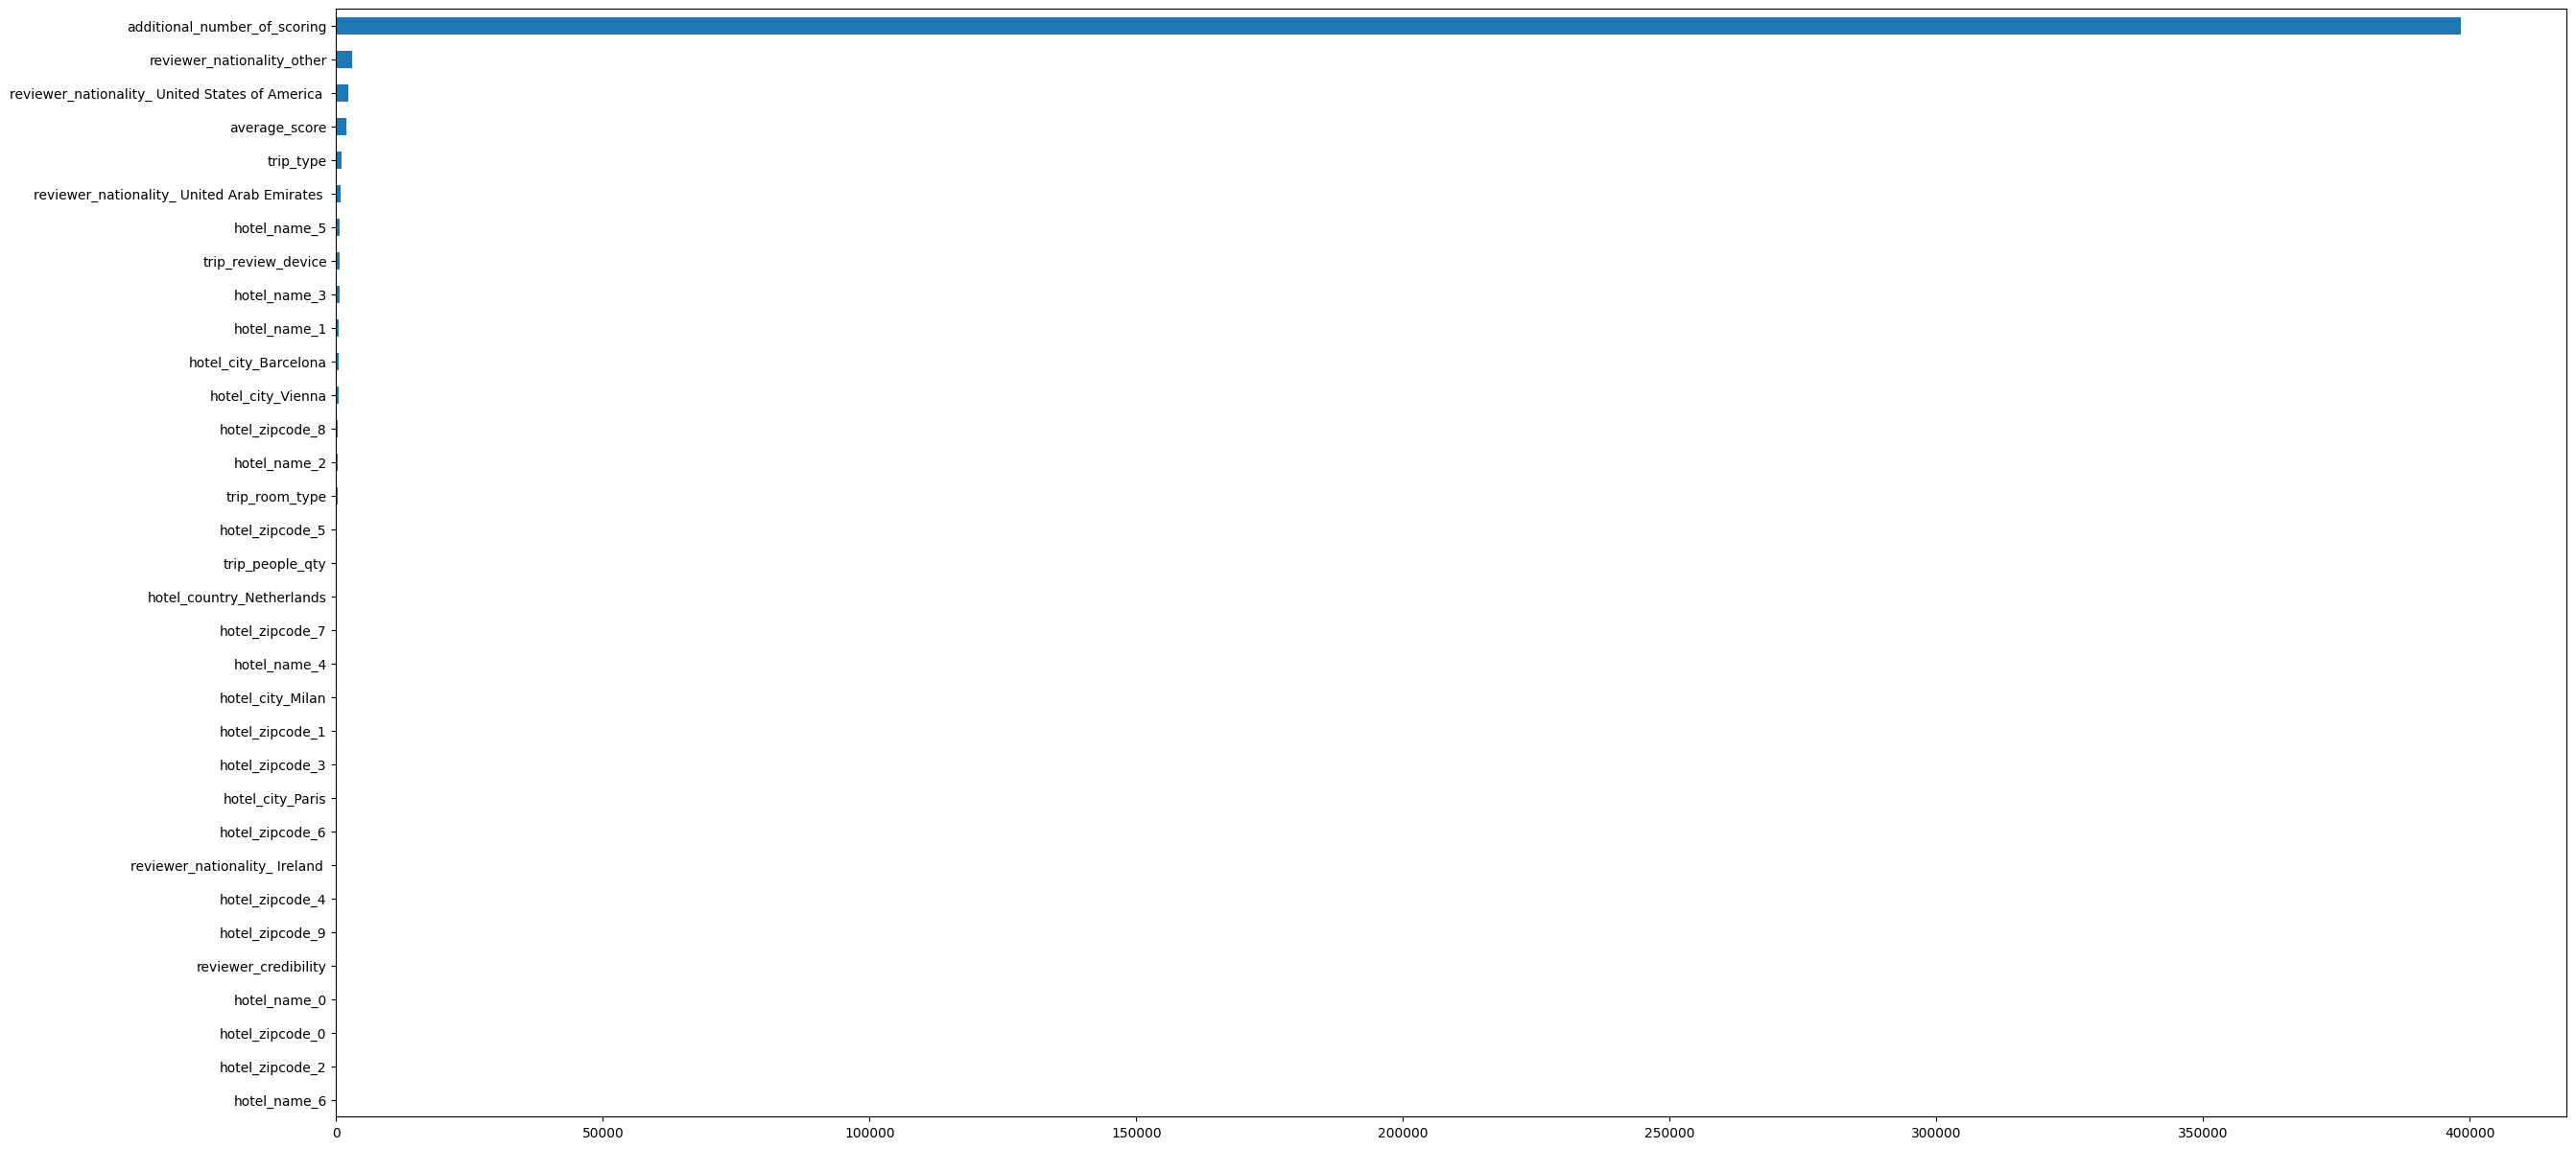

In [245]:
imp_cat = pd.Series(chi2(X[cat_cols], y.astype('int'))[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh', figsize=(30, 15))

Lets drop the columns that doesnt have much of relationship with target variable

In [246]:
drop_cat_col = [
    'reviewer_credibility',
    'hotel_name_0',
    'hotel_name_2',
    'hotel_name_4',
    'hotel_name_6',
    'hotel_country_Netherlands',
    'hotel_city_Milan',
    'hotel_city_Paris',
    'hotel_zipcode_0',
    'hotel_zipcode_1',
    'hotel_zipcode_2',
    'hotel_zipcode_3',
    'hotel_zipcode_4',
    'hotel_zipcode_5',
    'hotel_zipcode_6',
    'hotel_zipcode_7',
    'hotel_zipcode_8',
    'hotel_zipcode_9',
    'reviewer_nationality_ Ireland ',
    'trip_people_qty',
    'trip_room_type'
]

X.drop(columns=drop_cat_col, axis=1, inplace=True)
test_data.drop(columns=drop_cat_col, axis=1, inplace=True)
train_data.drop(columns=drop_cat_col, axis=1, inplace=True)

Lets perform Anova test for numerical features

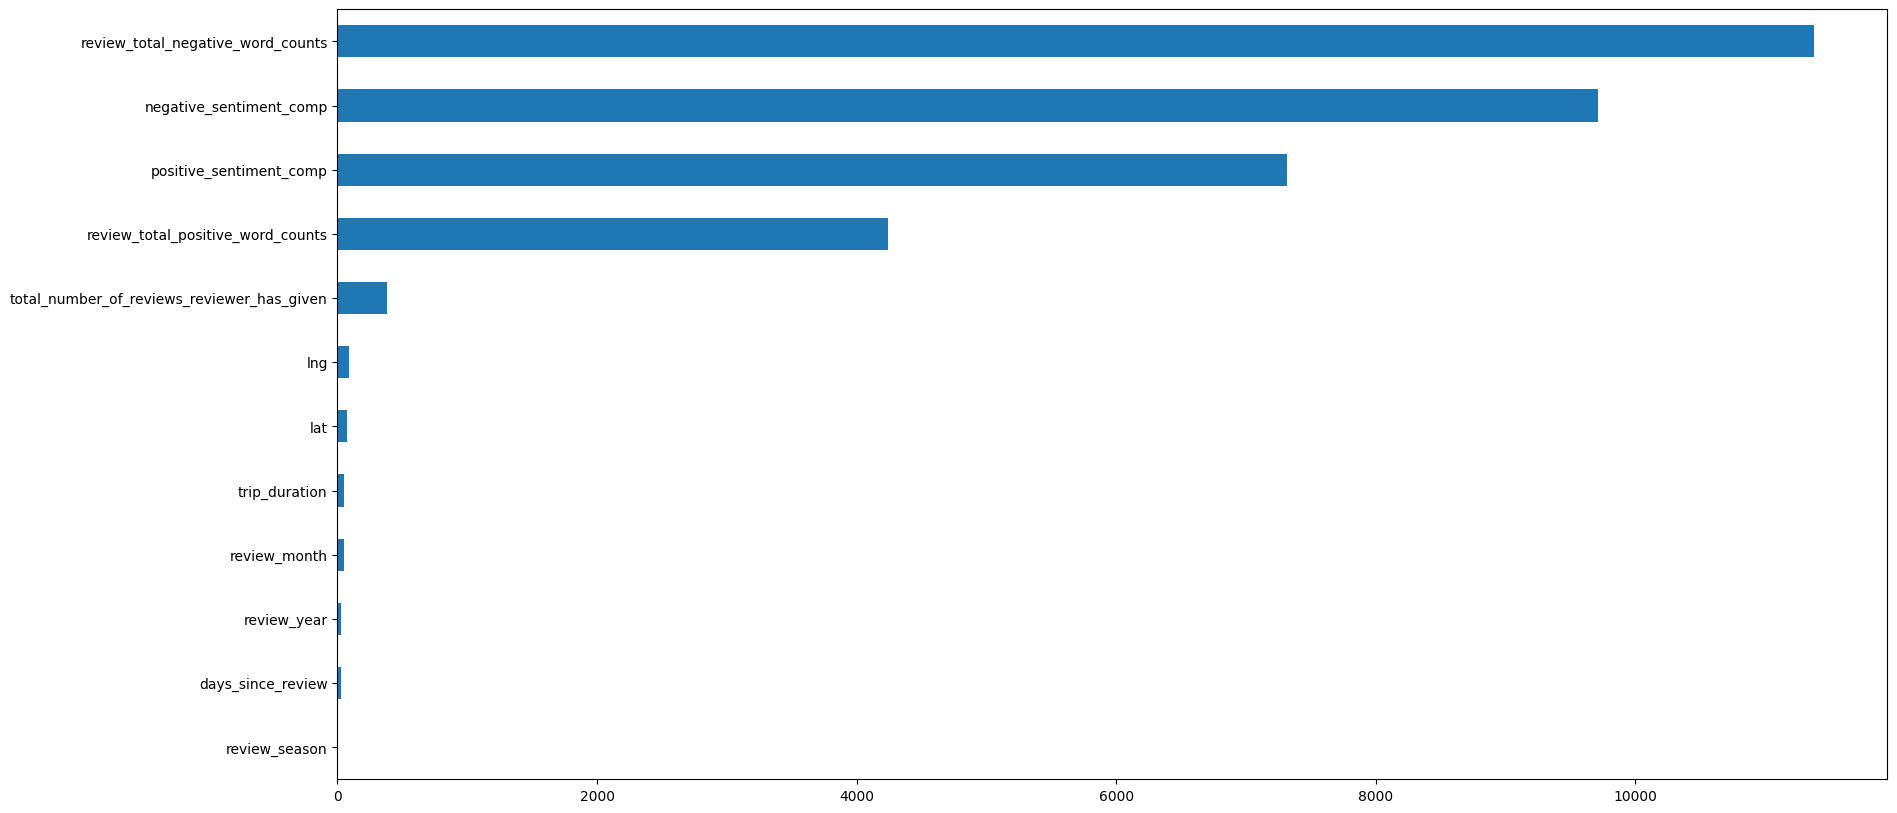

In [247]:
imp_num = pd.Series(f_classif(X[num_cols], y.astype('int'))[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind='barh', figsize=(20, 10));

Lets drop columns that doesnt have relationship with target

In [248]:
X.drop(columns=['review_season'], axis=1, inplace=True)
test_data.drop(columns=['review_season'], axis=1, inplace=True)
train_data.drop(columns=['review_season'], axis=1, inplace=True)

# Model Building

In [249]:
#we will use train_test_split function from sklearn.model_selection library to split our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [250]:
# checking
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 24), (386496, 46), (386496, 23), (309196, 23), (77300, 23))

In [251]:
# Creating Model
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [252]:
# Train model on test data set
model.fit(X_train, y_train)

# Use the trained model to predict the restaurant ratings in the test sample.
# Store the predicted values in the variable y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.2s finished


# Model Evaluation

In [253]:
#Compare the predicted values (y_pred) with the actual ones (y_test) to see how much they differ on average.
#The metric is called Mean Absolute Percentage Error (MAPE) and shows the average deviation of the predicted values from the actual ones.
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1263788578976282


<Axes: >

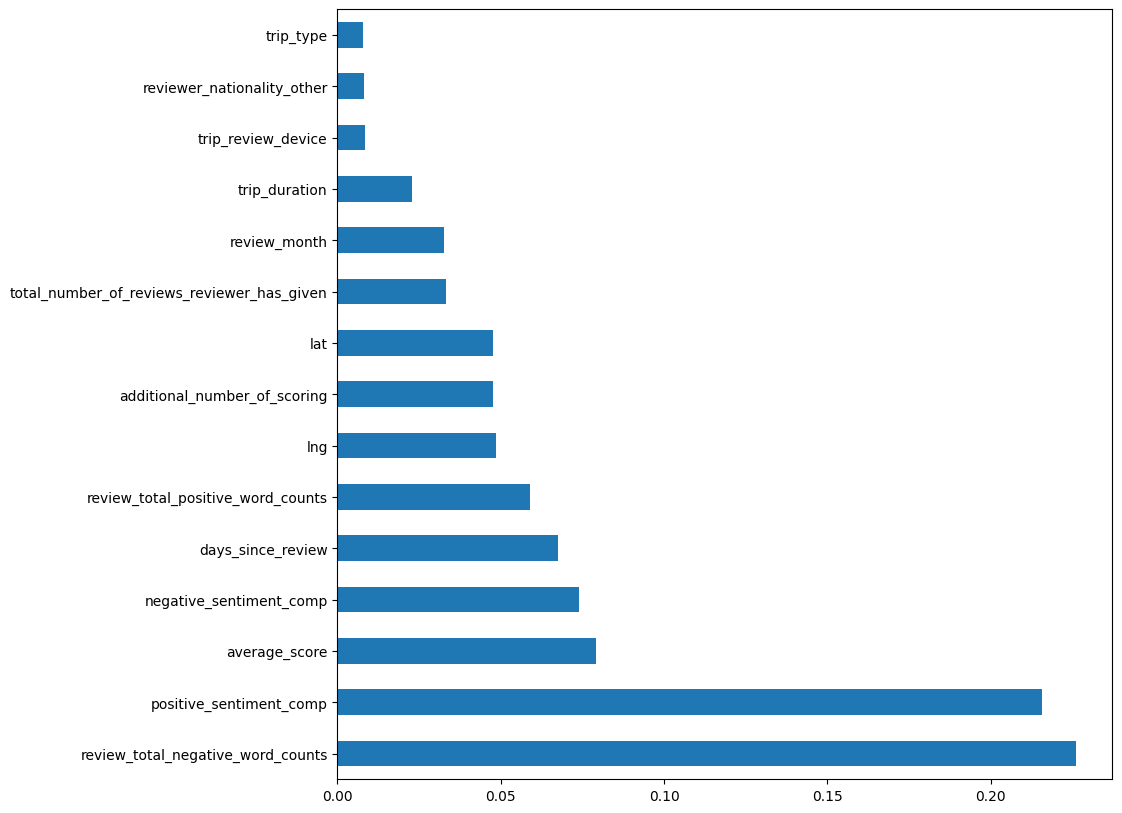

In [254]:
# displaying the most import features of our RandomForest model
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission of the results

In [255]:
test_data.sample(10)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,hotel_name_1,hotel_name_3,hotel_name_5,...,review_month,review_year,reviewer_nationality_ United Arab Emirates,reviewer_nationality_ United States of America,reviewer_nationality_other,negative_sentiment_comp,positive_sentiment_comp,trip_type,trip_duration,trip_review_device
489142,322.0,8.4,3.0,17.0,8.0,0.0,512,0,0,0,...,3,2016,False,True,False,0.0000,0.9641,1,3,0
449031,832.0,8.9,54.5,11.0,3.0,0.0,156,0,0,0,...,2,2017,False,False,False,-0.4910,0.8176,1,1,1
463254,176.0,8.7,0.0,28.0,1.0,0.0,529,0,0,0,...,2,2016,False,False,False,0.9200,0.8999,1,1,0
394263,154.0,8.2,25.0,36.0,2.0,0.0,439,0,0,0,...,5,2016,False,False,False,0.7506,0.9333,1,1,0
401804,681.0,8.9,0.0,33.0,6.0,0.0,319,1,1,0,...,9,2016,False,False,False,0.9200,0.9428,1,5,1
477197,1396.5,7.1,8.0,0.0,1.0,0.0,660,0,1,1,...,10,2015,False,False,False,0.0000,0.4200,1,1,0
417701,311.0,8.3,7.0,13.0,1.0,0.0,565,0,0,0,...,1,2016,False,False,True,0.0000,0.8588,1,2,1
398293,353.0,8.1,6.0,4.0,5.0,0.0,325,0,0,0,...,9,2016,False,False,True,-0.4585,0.0000,0,1,0
487701,1299.0,8.7,2.0,21.0,1.0,0.0,544,1,1,0,...,2,2016,False,False,False,0.0000,0.8771,1,1,1
490018,908.0,8.5,0.0,47.5,2.0,0.0,445,0,1,0,...,5,2016,False,False,True,0.9200,0.9806,0,2,1


In [256]:
test_data.drop(['reviewer_score'], axis=1, inplace=True)


In [257]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [258]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.5s finished


In [259]:
predict_submission

array([8.226, 7.487, 8.469, ..., 8.156, 9.654, 7.346])

In [260]:
list(sample_submission)

['reviewer_score', 'id']

In [261]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission_v4.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.226,488440
1,7.487,274649
2,8.469,374688
3,9.749,404352
4,9.540,451596
5,8.633,302161
6,7.988,317079
7,7.656,13963
8,8.513,159785
9,7.140,195089
